In [79]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing


In [80]:
df = pd.read_csv("features.csv")
df.head()
df = df.dropna()

In [81]:
heartWillGoOn = [{'acousticness': 0.732, 'danceability': 0.428, 'energy': 0.276,  
                 'id': '3oEHQmhvFLiE7ZYES0ulzv', 'instrumentalness': 5.33e-06, 'key': 4, 
                 'liveness': 0.117,'loudness': -11.729,'mode': 1,
                  'speechiness': 0.0312, 'tempo': 99.195, 'valence': 0.0382}]

In [82]:
df = df.append(heartWillGoOn)
df = df.reset_index()
df.tail()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,index,Unnamed: 0,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
96131,96132,96132.0,0.4520,0.5580,0.2980,189sZsPIyQbxXlLxfROKqS,0.000000,7,0.0931,-13.057,1,0.0279,72.308,0.3010
96132,96133,96133.0,0.0403,0.7530,0.6360,0cQuJEMXzmMGaWJmOhGMue,0.000002,5,0.1580,-9.482,0,0.0321,119.975,0.7810
96133,96134,96134.0,0.9760,0.1470,0.0324,4KvUvF2p3dwxYCbq4LswDA,0.978000,3,0.1140,-30.758,1,0.0418,137.658,0.0397
96134,96135,96135.0,0.9560,0.0662,0.1330,1GaZgdACZXURS0LAD8ypUi,0.931000,8,0.1370,-28.141,0,0.0368,74.823,0.2130
96135,0,NaN,0.7320,0.4280,0.2760,3oEHQmhvFLiE7ZYES0ulzv,0.000005,4,0.1170,-11.729,1,0.0312,99.195,0.0382


In [83]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df[['acousticness','danceability','energy','instrumentalness','key',\
                                           'liveness','loudness','mode','speechiness','tempo','valence']])
df_normalized = pd.DataFrame(np_scaled)


In [84]:
df_normalized.columns = ['acousticness','danceability','energy','instrumentalness','key',\
                                           'liveness','loudness','mode','speechiness','tempo','valence']

In [85]:
df_normalized['id'] = df['id']
df_normalized.tail()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id
96131,0.453815,0.565923,0.2980,0.000000,0.636364,0.093380,0.745837,1.0,0.028793,0.289320,0.3010,189sZsPIyQbxXlLxfROKqS
96132,0.040462,0.763692,0.6360,0.000002,0.454545,0.158475,0.802637,0.0,0.033127,0.480046,0.7810,0cQuJEMXzmMGaWJmOhGMue
96133,0.979920,0.149087,0.0324,0.978000,0.272727,0.114343,0.464601,1.0,0.043137,0.550799,0.0397,4KvUvF2p3dwxYCbq4LswDA
96134,0.959839,0.067140,0.1330,0.931000,0.727273,0.137412,0.506180,0.0,0.037977,0.299383,0.2130,1GaZgdACZXURS0LAD8ypUi
96135,0.734940,0.434077,0.2760,0.000005,0.363636,0.117352,0.766937,1.0,0.032198,0.396901,0.0382,3oEHQmhvFLiE7ZYES0ulzv


In [86]:
df_normalized,last_row=df_normalized.drop(df_normalized.tail(1).index),df_normalized.tail(1)
last_row

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id
96135,0.73494,0.434077,0.276,0.000005,0.363636,0.117352,0.766937,1.0,0.032198,0.396901,0.0382,3oEHQmhvFLiE7ZYES0ulzv


In [88]:
last_row['acousticness']

96135    0.73494
Name: acousticness, dtype: float64

In [87]:
df_normalized.tail()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id
96130,0.723896,0.504057,0.2850,0.000000,0.181818,0.086359,0.743311,1.0,0.031373,0.491329,0.1820,0wyezCfJkCN8hoU4brz3JZ
96131,0.453815,0.565923,0.2980,0.000000,0.636364,0.093380,0.745837,1.0,0.028793,0.289320,0.3010,189sZsPIyQbxXlLxfROKqS
96132,0.040462,0.763692,0.6360,0.000002,0.454545,0.158475,0.802637,0.0,0.033127,0.480046,0.7810,0cQuJEMXzmMGaWJmOhGMue
96133,0.979920,0.149087,0.0324,0.978000,0.272727,0.114343,0.464601,1.0,0.043137,0.550799,0.0397,4KvUvF2p3dwxYCbq4LswDA
96134,0.959839,0.067140,0.1330,0.931000,0.727273,0.137412,0.506180,0.0,0.037977,0.299383,0.2130,1GaZgdACZXURS0LAD8ypUi


In [ ]:
for index,row in normalized_df.iterrows():

In [4]:
target = df["class"]
target_names = ["Not Recommended", "Recommended"]

KeyError: 'class'

In [4]:
data = df.drop(["class", "Score","Input"], axis=1)
feature_names = data.columns
data.head()

,popularity,danceability,energy,loudness,speechiness,duration_ms,tempo
0,94,0.851,0.541,-6.825,0.0505,235545,124.959
1,97,0.511,0.566,-7.230,0.2000,239836,83.903
2,95,0.680,0.563,-5.843,0.0454,231267,145.028
3,91,0.900,0.653,-6.962,0.2890,145603,112.503
4,84,0.572,0.385,-6.362,0.0308,215733,95.799


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.640
k: 3, Train/Test Score: 0.773/0.560
k: 5, Train/Test Score: 0.760/0.680
k: 7, Train/Test Score: 0.760/0.600
k: 9, Train/Test Score: 0.760/0.600
k: 11, Train/Test Score: 0.733/0.600
k: 13, Train/Test Score: 0.733/0.600
k: 15, Train/Test Score: 0.733/0.600
k: 17, Train/Test Score: 0.733/0.600
k: 19, Train/Test Score: 0.733/0.600
k: 21, Train/Test Score: 0.733/0.600
k: 23, Train/Test Score: 0.733/0.600
k: 25, Train/Test Score: 0.733/0.600
k: 27, Train/Test Score: 0.733/0.600
k: 29, Train/Test Score: 0.733/0.600


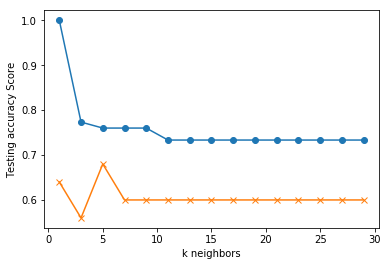

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.600
